Published on August 21, 2023. By Marília Prata, mpwolke

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go

import plotly
plotly.offline.init_notebook_mode(connected=True)

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/snoring/Snoring Dataset/Snoring_dataset.txt
/kaggle/input/snoring/Snoring Dataset/0/0_468.wav
/kaggle/input/snoring/Snoring Dataset/0/0_165.wav
/kaggle/input/snoring/Snoring Dataset/0/0_163.wav
/kaggle/input/snoring/Snoring Dataset/0/0_52.wav
/kaggle/input/snoring/Snoring Dataset/0/0_30.wav
/kaggle/input/snoring/Snoring Dataset/0/0_75.wav
/kaggle/input/snoring/Snoring Dataset/0/0_436.wav
/kaggle/input/snoring/Snoring Dataset/0/0_325.wav
/kaggle/input/snoring/Snoring Dataset/0/0_344.wav
/kaggle/input/snoring/Snoring Dataset/0/0_433.wav
/kaggle/input/snoring/Snoring Dataset/0/0_249.wav
/kaggle/input/snoring/Snoring Dataset/0/0_54.wav
/kaggle/input/snoring/Snoring Dataset/0/0_227.wav
/kaggle/input/snoring/Snoring Dataset/0/0_111.wav
/kaggle/input/snoring/Snoring Dataset/0/0_197.wav
/kaggle/input/snoring/Snoring Dataset/0/0_32.wav
/kaggle/input/snoring/Snoring Dataset/0/0_315.wav
/kaggle/input/snoring/Snoring Dataset/0/0_483.wav
/kaggle/input/snoring/Snoring Dataset/0/0_330.w

#Snoring interfere with Sleep Quality and Quantity

#Citation:

T. H. Khan, "A deep learning model for snoring detection and vibration notification using a smart wearable gadget," Electronics, vol. 8, no. 9, article. 987, ISSN 2079-9292, 2019.

"Snoring, a form of sleep-disordered breathing, interferes with sleep quality and quantity, both for the person who snores and often for the person who sleeps with the snorer. Poor sleep caused by snoring can create significant physical, mental, and economic problems. A simple and natural solution for snoring is to sleep on the side, instead of sleeping on the back."

"In this project, a deep learning model for snoring detection is developed and the model is transferred to an embedded system referred to as the listener module to automatically detect snoring. A novel wearable gadget is developed to apply a vibration notification on the upper arm until the snorer sleeps on the side. The gadget is rechargeable, and it is wirelessly connected to the listener module using low energy Bluetooth.

"A smartphone app connected to the listener module using home Wi-Fi is developed to log the snoring events with timestamps, and the data can be transferred to a physician for treating and monitoring diseases such as sleep apnea. The snoring detection deep learning model has an accuracy of 96%. A prototype system consisting of the listener module, the wearable gadget, and a smartphone app has been developed and tested successfully."

https://www.mdpi.com/2079-9292/8/9/987

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

#Snoring Dataset

In [4]:
snore = '../input/snoring/Snoring Dataset/Snoring_dataset.txt'
with open(snore) as f: # The with keyword automatically closes the file when you are done
    print (f.read(3000))

Title: Snoring Dataset 

Created by Tareq Khan [Email: tareq.khan@emich.edu]

Dataset Sources
The snoring sounds were collected from different online sources as below:
https://www.soundsnap.com/tags/snoring (accessed on 6 August 2019).
https://www.zapsplat.com/sound-effect-category/breathing-and-snoring (accessed on 6 August 2019).
https://www.fesliyanstudios.com/royalty-free-sound-effects-download/people-snoring-189 (accessed on 6 August 2019).
https://www.youtube.com/watch?v=1deTKPX1j8c (accessed on 6 August 2019).
https://www.youtube.com/watch?v=SOxwffK0xUc (accessed on 6 August 2019).


Description of the Snoring Dataset

The dataset contains two folders - one for snoring and the other for non-snoring. 

Folder 1 contains snoring sounds. It has total 500 sounds. Each sound is 1 second in duration.
Among the 500 snoring samples, 363 samples consist of snoring sounds of children, adult men and adult women without any background sound. The remaining 137 samples consist of snoring soun

In [5]:
#By Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

def load_audio(AUDIO_PATH):
    audio, sr = librosa.load(AUDIO_PATH)
    return audio, sr

def wav2melSpec(AUDIO_PATH):
    audio, sr = librosa.load(AUDIO_PATH)
    return librosa.feature.melspectrogram(y=audio, sr=sr)

def imgSpec(ms_feature):
    fig, ax = plt.subplots()
    ms_dB = librosa.power_to_db(ms_feature, ref=np.max)
    print(ms_feature.shape)
    img = librosa.display.specshow(ms_dB, x_axis='time', y_axis='mel', ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram');
    
def hear_audio(AUDIO_PATH):
    audio, sr = librosa.load(AUDIO_PATH)
    print("\t", end="")
    ipd.display(ipd.Audio(data=audio, rate=sr))
    
    
def get_audio_info(path, show_melspec=False, label=None):
    spec = wav2melSpec(path)
    if label is not None:
        print("Label:", label)
    if show_melspec is not False:
        imgSpec(spec)
    hear_audio(path)

(128, 44)
	

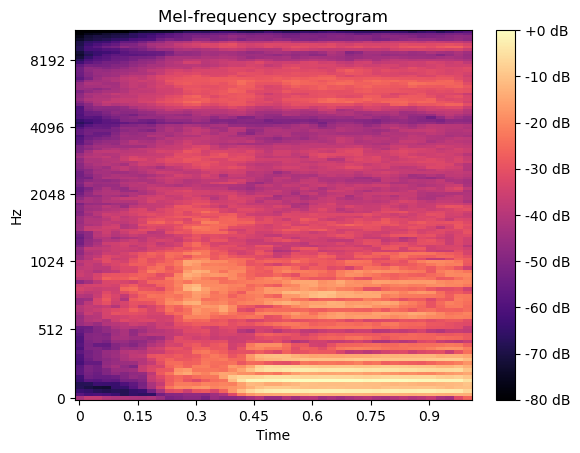

In [6]:
get_audio_info('/kaggle/input/snoring/Snoring Dataset/1/1_11.wav', show_melspec=True)

(128, 44)
	

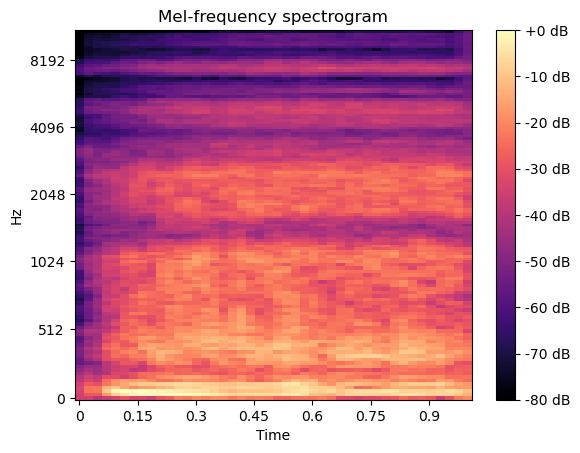

In [7]:
get_audio_info('/kaggle/input/snoring/Snoring Dataset/1/1_109.wav', show_melspec=True)

In [15]:
#By Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

class TextTransform:
    def __init__(self):
        self.char_to_num_dict =  {
      "а": 1, "б": 2, "в": 3, "г": 4, "д": 5, "е": 6, "ё": 7, "ж": 8, "з": 9, "и": 10, "й": 11,
      "к": 12, "л": 13, "м": 14, "н": 15, "о": 16, "п": 17, "р": 18, "с": 19, "т": 20, "у": 21,
      "ф": 22, "х": 23, "ц": 24, "ч": 25, "ш": 26, "щ": 27, "ь": 28, "ы": 29, "ъ": 30, "э": 31,
      "ю": 32, "я": 33, " ": 34}
    
        self.index_map = {}
        for key, value in self.char_to_num_dict.items():
            self.index_map[value] = key
    
    def char_to_num(self, sentence):
        num_sent = np.zeros(5000) #количество символов самого длинного текста
        i = 0 
        for char in sentence.lower():
            if char in self.char_to_num_dict.keys():
                num_sent[i]=self.char_to_num_dict[char]
            i += 1
        return num_sent
  
    def num_to_char(self, sentence):
        char_sent = np.array()
        i = 0 
        for num in sentence:
            char_sent[i]=self.index_map[num]
            i += 1
        return char_sent

In [17]:
#By Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

text_transform = TextTransform()

labels = []
#for label in labels_uniq:
    #labels.append(label)
    #labels.append(label)

labels = list(map(text_transform.char_to_num, labels))

#MFCC coefficients

Obtaining mfcc coefficients with expanding the spectrograms to a single size and expanding the dataset by increasing the frequencies by an octave every few steps.

mfcc coefficients largely depend on the set parameters, which requires a more detailed study.

In [8]:
#By Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

MFCC_NUM =  14
SAMPLING_RATE = 44100 #Мб при понижении частоты дискретизации данные будут более однозначные на распознавание подаваться
MFCC_MAX_LEN = 2000 #Определить, какая запись самая длинная

def wav2mfcc(wave, max_len=MFCC_MAX_LEN):
    mfcc = librosa.feature.mfcc(y=wave, n_mfcc=MFCC_NUM, sr=SAMPLING_RATE)

    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc

In [9]:
snore_path =  "/kaggle/input/snoring/Snoring Dataset"

In [12]:
#By Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

files_in_dir = os.listdir(snore_path)
mfcc_spectograms = []
i = 1

for e in range(1, 2001):
    file_name = f'1_109.wav' #Original f'{e}.wav' There is a space after the V1_1space(2)
    sampl = librosa.load(f'{snore_path}/1/{file_name}')[0]
    spectrogram = np.expand_dims(wav2mfcc(sampl), -1)
    mfcc_spectograms.append(spectrogram)
    sampl_shifted = librosa.effects.pitch_shift(sampl,sr = SAMPLING_RATE, n_steps=12)
    spectrogram_shifted = np.expand_dims(wav2mfcc(sampl_shifted), -1)
    mfcc_spectograms.append(spectrogram_shifted)

    if i % 100 == 0:
        print(i)
    i += 1

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


#Train test split

Splitting data into test/training and validation sets, as well as trimming text data to the length of the second longest phrase due to memory overflow in case of using longer phrases.

In [18]:
#By Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

def cut_array(text_arr):
    return text_arr[:1756] #Where this number came from?

border = 3800
    
audio_train, text_train, audio_test, text_test = np.array(mfcc_spectograms[:3800]), np.array(list(map(cut_array, labels[:3800]))), np.array(mfcc_spectograms[3800:]), np.array(list(map(cut_array,labels[3800:])))
print(text_train.shape)

(0,)


#Above Data cardinality is ambiguous: x sizes: 0 and y sizes: Nothing

That Zero above was expected since the script was made for text/csv/wav files

By the way, What are those numbers above 1756, 3800??

#Build a CNN

Building a convolutional neural network. This is a field that requires studying the effect of the ongoing transformations on the spectrogram in order to isolate the correct algorithm. The network is very conditional.

In [19]:
#By Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

dropout = 0.15
input_dim = (14, 2000,1)
output_dim_vocab = 34
output_dim = 1756 



model = Sequential([
  layers.Conv2D(filters=32, kernel_size=[6, 6], strides=[2, 2],input_shape=input_dim, padding="same", use_bias=False),
  layers.BatchNormalization(),
  layers.Activation(activation='leaky_relu'),
  layers.MaxPooling2D(pool_size=(3,3)),
  layers.Dropout(dropout),
  # 2 layer
  layers.Conv2D(128,(3,3),padding='same'),
  layers.BatchNormalization(),
  layers.Activation(activation='relu'),
#   layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(dropout),
  # 3 conv layer
  layers.Conv2D(512,(3,3),padding='same'),
  layers.BatchNormalization(),
  layers.Activation(activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(dropout),
  # 4 conv layer
  layers.Conv2D(512,(3,3),padding='same'),
  layers.BatchNormalization(),
  layers.Activation(activation='relu'),
#   layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(dropout),  
  layers.Dense(512),
  layers.Activation(activation='leaky_relu'),
  layers.Dropout(dropout),
  layers.Conv2D(filters=32, kernel_size=[6, 6], strides=[1, 1], padding="same", use_bias=False),
#   fully cpnnected layer with 256 nuerons
  layers.Flatten(),
  layers.Dense(256, activation="softmax"),
  layers.BatchNormalization(),
  layers.Dropout(dropout),  
  layers.Activation(activation='relu'),
#   fully cpnnected layer with 512 nuerons
  layers.Dense(output_dim_vocab, activation="softmax"),
  layers.Dense(512, activation="softmax"),
  layers.BatchNormalization(),
  layers.Dropout(dropout),  
  layers.Activation(activation='relu'),
#     output layer
  layers.Dense(output_dim, activation="softmax"),
])

#CTC Loss Function

"The CTC loss function and the Wer\Cer metrics are desirable for use in this case, but manual implementation of these functions is required in keras. We are clearly limited in time to deal with this. The role of time metrics and functions was played by accuracy and categorical crossentropy, respectively."

In [20]:
#By Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0],dtype = 'int64')
    input_length = tf.cast(tf.shape(y_pred)[1],dtype = 'int64')
    label_length = tf.cast(tf.shape(y_true)[1],dtype = 'int64')
    
    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype = 'int64')
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype = 'int64')
    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [21]:
#By Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5), 
    loss='categorical_crossentropy',
#     loss=CTCLoss,
#     metrics=[CERMetric(), WERMetric()],
#     metrics=EditDistance())
    metrics=['accuracy'])

In [22]:
#By Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

# Define callbacks
model_path = 'Snoring_model'

earlystopper = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min')
checkpoint = ModelCheckpoint(f"{model_path}/model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
tb_callback = TensorBoard(f'{model_path}/logs', update_freq=1)
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, min_delta=1e-10, patience=3, verbose=1, mode='auto')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 1000, 32)       1152      
                                                                 
 batch_normalization (BatchN  (None, 7, 1000, 32)      128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 7, 1000, 32)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 333, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2, 333, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 333, 128)       3

#Since I couldn't fix the snippet below. Even after trying different things. I'll stop Snoring.

In [24]:
#By Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project

# Train the model
history = model.fit(
    x=audio_train,
    y=text_train,#We don't have text train
    validation_split=0.1,
    epochs=5, #Original is 50
    batch_size=26,
    callbacks=[earlystopper, checkpoint, reduceLROnPlat, tb_callback]
)

ValueError: Data cardinality is ambiguous:
  x sizes: 3420
  y sizes: 0
Make sure all arrays contain the same number of samples.

![](https://media.tenor.com/7Dq8xanpLSQAAAAM/homer-snoring.gif)Tenor

#Acknowledgements:

Yanapple https://www.kaggle.com/code/yanapple/speech-to-text-summer-project